In [85]:
#内嵌画图
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

一、加载数据

In [86]:
data = pd.read_csv('datasets/pima-indians-diabetes/diabetes.csv')

In [87]:
print('dataset shape {}'.format(data.shape))  #等于 print('dataset shape',format(data.shape))

dataset shape (768, 9)


In [88]:
data.head() #输出前5条数据

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


从输出可以看到，总共有768个样本，8个特征，其中outcome为标记值，0表示没有糖尿病，1表示有糖尿病，8个特征如下：
○ 怀孕的次数
○ 血浆葡萄糖浓度，采用2小时口服葡萄糖耐量试验得到
○ 舒张压（毫米汞柱）
○ 肱二头肌皮肤褶皱厚度（毫米）
○ 两小时血清胰岛素（μU/毫升）
○ 身体质量指数
○ 糖尿病血统指数，糖尿病和家庭遗传有关
○ 年龄

In [89]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

阴性样本500例，阳性样本268例，接下来划分训练数据集和测试数据集

In [90]:
X = data.iloc[:, 0:8]

In [91]:
Y = data.iloc[:,8]  #Y.head()

In [92]:
print('shape of X {};shape of Y {}'.format(X.shape, Y.shape))

shape of X (768, 8);shape of Y (768,)


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #训练集和测试集随机分配

In [95]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,5,158,84,41,210,39.4,0.395,29
677,0,93,60,0,0,35.3,0.263,25
602,1,124,74,36,0,27.8,0.100,30
205,5,111,72,28,0,23.9,0.407,27
31,3,158,76,36,245,31.6,0.851,28


In [96]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
93,4,134,72,0,0,23.8,0.277,60
759,6,190,92,0,0,35.5,0.278,66
526,1,97,64,19,82,18.2,0.299,21
635,13,104,72,0,0,31.2,0.465,38
307,0,137,68,14,148,24.8,0.143,21


In [97]:
X_train.shape

(614, 8)

In [98]:
X_test.shape

(154, 8)

二、模型比较

In [99]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [100]:
#构造三个模型
models = []

In [101]:
models.append(("KNN", KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN with weights ',KNeighborsClassifier(n_neighbors=2, weights="distance")))
models.append(("KNN Neighbors", RadiusNeighborsClassifier(n_neighbors=2, radius=500.00)))

In [102]:
results = []# 空列表

In [103]:
for name, model in models:
    model.fit(X_train, Y_train)
    results.append((name, model.score(X_test, Y_test))) # 使用 append() 添加元素

In [104]:
for i in range(len(results)):
    print("name: {};score: {}".format(results[i][0],results[i][1]))

name: KNN;score: 0.6883116883116883
name: KNN with weights ;score: 0.6818181818181818
name: KNN Neighbors;score: 0.6233766233766234


In [105]:
#多次随机分配训练集和交叉验证数据集来计算模型的准确性，然后求模型准确性评分的平均值
#通过KFold把数据集分成10份，其中1份会作为交叉验证数据集来计算模型准确性，剩余9份作为训练数据集
#n重交叉检验，cross_val_score返回一个有n个值(得分)的对象
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X, Y, cv=kfold)
    # print(name,model)
    results.append((name, cv_result))

In [106]:
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(results[i][0], results[i][1].mean()))

name: KNN; cross val score: 0.7147641831852358
name: KNN with weights ; cross val score: 0.6770505809979495
name: KNN Neighbors; cross val score: 0.6497265892002735


三、模型训练及分析

In [107]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)
print("train score:{};test score:{}".format(train_score,test_score))

train score:0.8485342019543974;test score:0.6883116883116883


In [112]:
#对训练样本的拟合情况不佳，模型太过简单，模型准确性欠佳
#进一步绘制学习曲线验证结论
from sklearn.model_selection import ShuffleSplit
from common.utils import plot_learning_curve


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

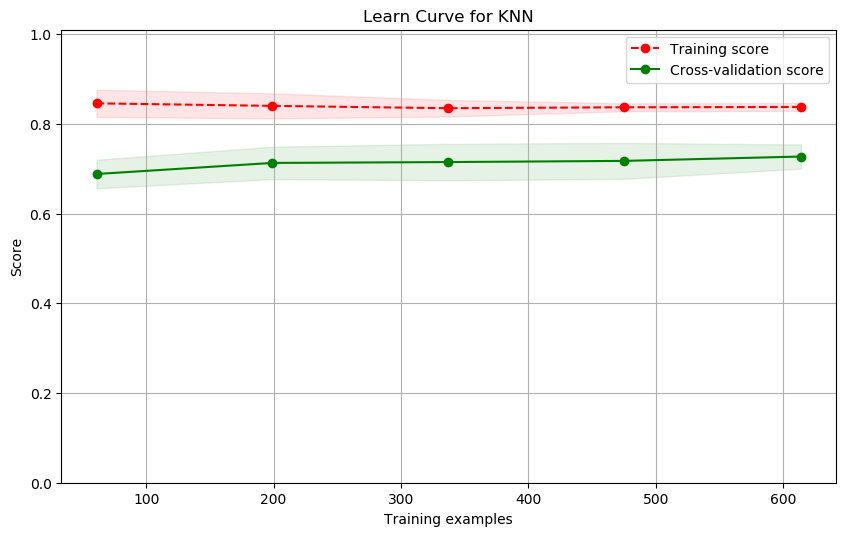

In [117]:
knn = KNeighborsClassifier(n_neighbors=2)
cv = ShuffleSplit(n_splits=10, test_size=0.2,random_state=0) #代表迭代次数 #默认为10  随机种子值，默认为None
plt.figure(figsize=(10,6), dpi=100) #dpi分辨率
plot_learning_curve(plt, knn, "Learn Curve for KNN", X, Y, ylim=(0.0, 1.01), cv=cv)

四、特征选择及数据可视化

In [118]:
#选择2个与输出值相关性最大的特征，在二维平面看下输入值与输出值之间的关系
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=2)
X_new = selector.fit_transform(X,Y)

In [119]:
X_new[0:5]  #对比数据集发现是血浆浓度和BMI

array([[ 148. ,   33.6],
       [  85. ,   26.6],
       [ 183. ,   23.3],
       [  89. ,   28.1],
       [ 137. ,   43.1]])

In [120]:
#研究下仅适用2个相关性最高的特征，3种不同的K-近邻算法哪个的准确率最高
results = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model, X_new, Y, cv=kfold)
    # print(name,model)
    results.append((name, cv_result))
for i in range(len(results)):
    print("name: {}; cross val score: {}".format(results[i][0], results[i][1].mean()))

name: KNN; cross val score: 0.725205058099795
name: KNN with weights ; cross val score: 0.6900375939849623
name: KNN Neighbors; cross val score: 0.6510252904989747


普通K-近邻模型准确率最高，侧面印证SelectKBest特征选择函数的准确性

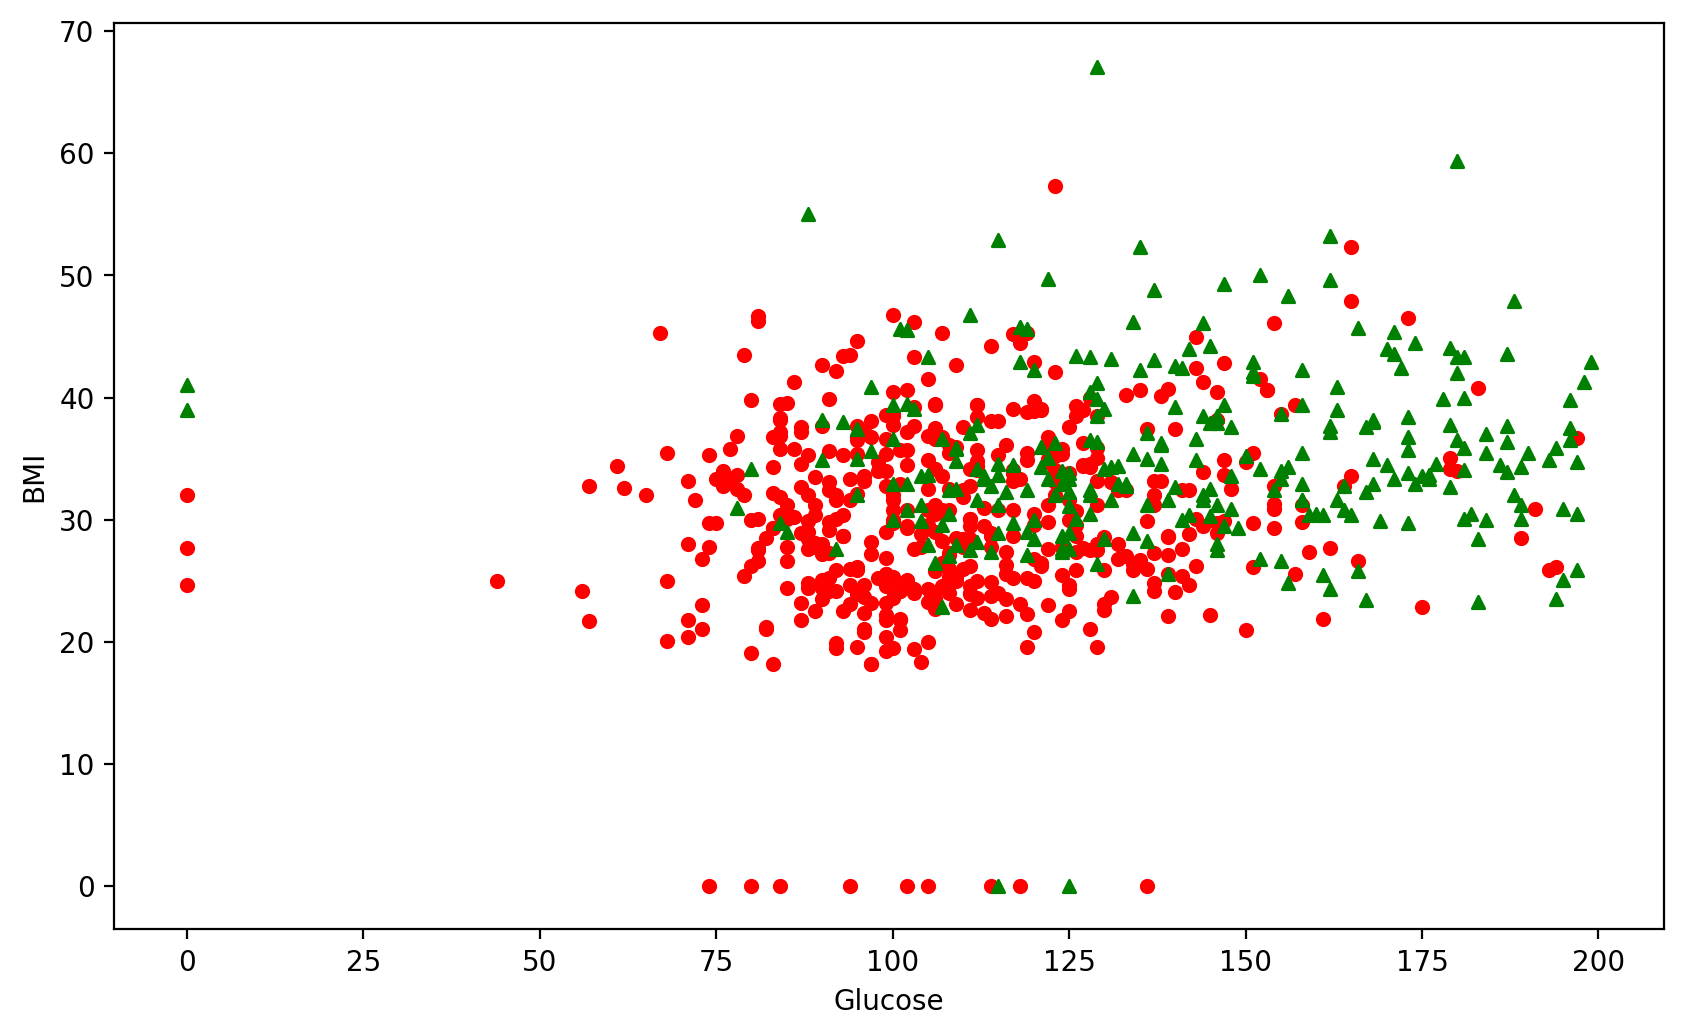

In [129]:
#为什么K近邻无法很好的拟合训练样本
#画出数据
plt.figure(figsize=(10,6),dpi=200)
plt.ylabel("BMI")
plt.xlabel("Glucose")
plt.scatter(X_new[Y==0][:,0],X_new[Y==0][:,1],c='r',s=20,marker='o') #y==0,阳性，没有糖尿病
plt.scatter(X_new[Y==1][:,0],X_new[Y==1][:,1],c='g',s=20,marker='^')

从图中发现，在中间数据密集的区域，阴性样本和阳性样本基本上重合在一起了，假设现在有一个待预测的样本中间密集区域，它的阴性邻居和阳性邻居谁多，真的还不好说，所以在糖尿病这个问题上，无法达到很高的预测性。